# Practica #3

Juan Esteban Campillo Zuluaga

Angie Dayana Tovar Bohorquez

Catalina Guerra Fernandez

In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 2.7 MB/s eta 0:00:00


####**Importación librerias**

In [110]:
import math
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pingouin as pg
from scipy import stats
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import adfuller
from scipy.interpolate import interp1d


#### **Implementación de la función**

In [111]:
def RMS(datos):

    N= np.shape(datos)[1]
    suma= sum(x**2 for x in datos[0])
    rms= math.sqrt(suma/N)

    return rms

mat_contents = sio.loadmat('signals.mat')
original = mat_contents['ECG_asRecording']
filtered = mat_contents['ECG_filtered']

#### **Análisis estadístico de ECG**

**1. Creación del vector tiempo**


In [121]:
tiempo = np.arange(0,(1/1024)*np.shape(original)[1],1/1024)
tiempo2 = np.arange(0,(1/1024)*np.shape(filtered)[1],1/1024)

**2. Grafico de la señal filtrada y sin filtrar**

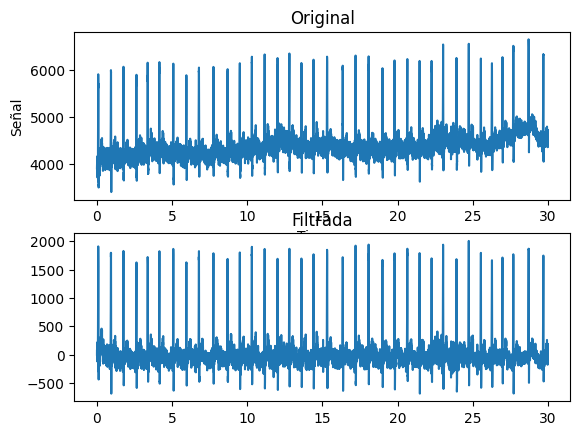

In [124]:
plt.subplot(2, 1, 1)
plt.plot(tiempo,original[0])
plt.ylabel('Señal')
plt.xlabel('Tiempo')
plt.title('Original')
plt.subplot(2,1,2)
plt.plot(tiempo2, filtered[0])
plt.ylabel('Señal')
plt.xlabel('Tiempo')
plt.title('Filtrada')
plt.show()

 En la gráfica filtrada se observa que se quita el offset que tienen los datos originales

**3. Ciclo cardiaco de la señal original, con analisis de las medidas de tendencia**

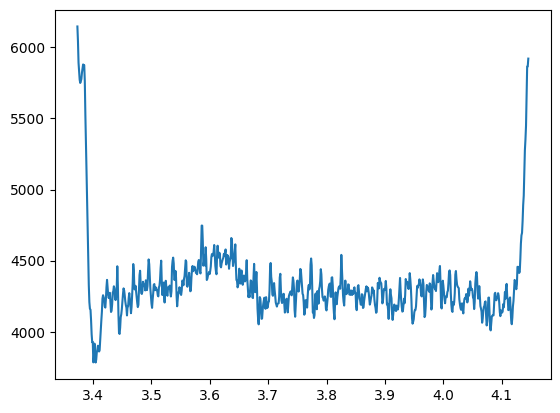

 La media es: 4146.573967773437 , la desviación estandar es 369.9118512357583, la varianza es: 136834.77768466578, el valor RMS es: 4163.041009634786


In [125]:
a,b = find_peaks(original[0], height=6000, threshold = 5)
inicio = a[1]
fin = a[2]

plt.plot(tiempo[inicio:fin], original[0][inicio:fin])

plt.show()

serie = original[0][0:1000]

media= serie.mean()
desv= serie.std()
varianza = np.var(serie)
rms = np.sqrt(np.mean(np.square(serie)))
print(f' La media es: {media} , la desviación estandar es {desv}, la varianza es: {varianza}, el valor RMS es: {rms}')

Debido a que la media representa el valor promedio de la señal, el valor de 4146.57 indica el promedio de este ciclo. El valor de 369.91 de la desviación estandar sugiere que hay una variabilidad significativa en la amplitud de la señal respecto a su media. La varianza es el cuadrado de la desviación estándar y mide la variabilidad de la señal en términos cuadrados. Aquí, una varianza de 136834.78 refuerza la idea de que la señal presenta una variabilidad considerable. El valor RMS ligeramente superior a la media sugiere que la señal puede tener picos significativos

**4. Ciclo cardiaco de la señal filtrada, con analisis de las medidas de tendencia**

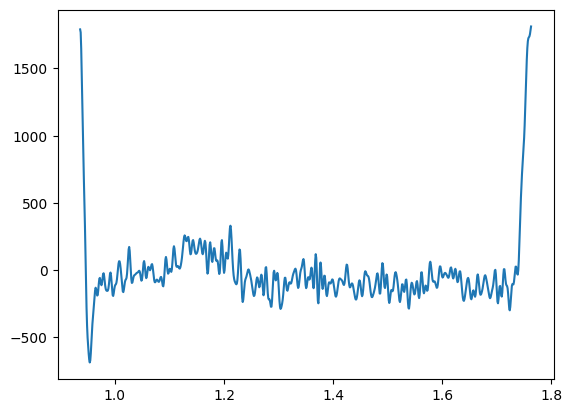

 la media es: 178.91284910655983, la desviación estandar es 369.5712994275254, la varianza es: 136582.9453605496, el valor RMS es: 410.6004784897068


In [ ]:
a,b = find_peaks(filtered[0], height=1500, threshold = 5)
inicio = a[1]
fin = a[2]

plt.plot(tiempo2[inicio:fin], filtered[0][inicio:fin])
plt.show()

serie = filtered[0][0:500]

media= serie.mean()

desv= serie.std()

varianza = np.var(serie)

rms = np.sqrt(np.mean(np.square(serie)))
print(f' la media es: {media}, la desviación estandar es {desv}, la varianza es: {varianza}, el valor RMS es: {rms}')

La media de la señal filtrada es significativamente más baja que la señal original, esto puede ser por la eliminación de componentes de alta frecuencia o ruido que estaban presentes en la señal original. La desviación estándar de la señal filtrada es casi idéntica a la de la señal original, indicando que la variabilidad relativa de la señal se ha mantenido constante. Esto significa que el filtrado no ha afectado significativamente la dispersión o fluctuación en la señal. El valor RMS de la señal filtrada es considerablemente menor que el de la señal original. Esto indica una reducción significativa en la energía total de la señal después del filtrado.


**5. Quince ciclos de la señal filtrada, con su respectivo valor promedio y varianza**


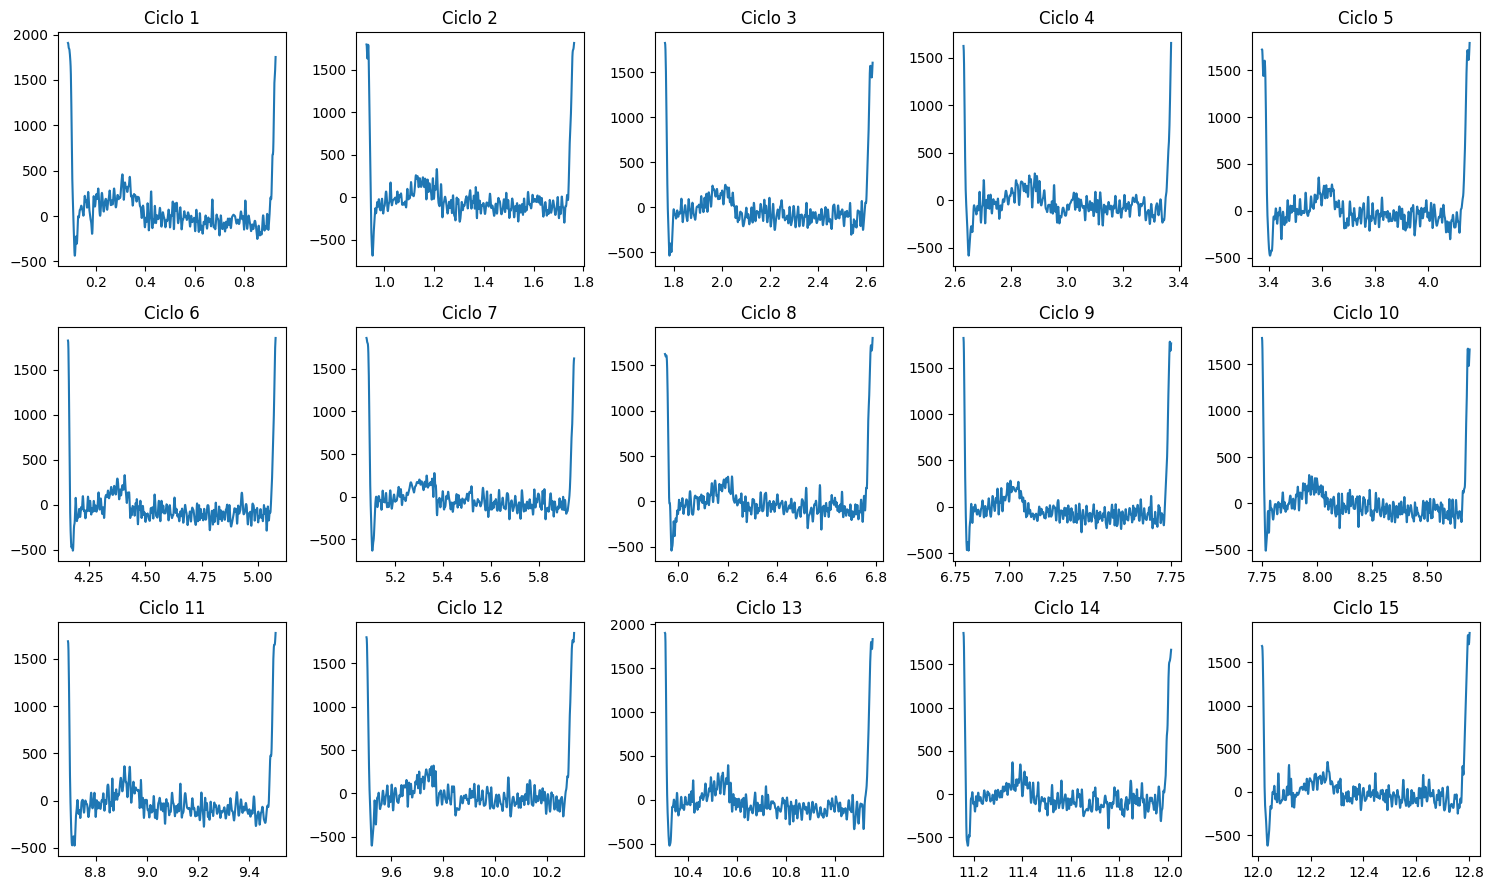

El promedio de cada uno de los 15 ciclos es 
[ 74.00995782  -1.46257818 -10.43300023 -20.975178    40.87110479
 -27.94373422   0.43078686  21.40785343 -10.17528984   8.81210266
  -8.90615825  13.21327398  -4.20326255 -14.96968899  27.10831623] respectivamente

La varianza de cada uno de los 15 ciclos es
 [ 96684.31488232 104790.46548942  82451.25107859  46839.01969415
 114850.0200645   58147.58951151  77707.28120178 100268.18152772
  71784.95578593  68481.0597626   76088.38489782  93862.69588331
  87951.50447594  77022.13291729  89636.93559972] respectivamente


In [132]:
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
prom_lista = np.array([])
var_lista = []
lista_ciclos = []
lista_tiempos = []

for i, ax in enumerate(axes.flat):

    a,b = find_peaks(filtered[0], height=1500, distance = 200)

    x = tiempo2[a[i]:a[i+1]]
    y =  filtered[0][a[i]:a[i+1]]

    promedio = y.mean()
    prom_lista = np.append(prom_lista ,promedio)

    varianza=y.var()
    var_lista = np.append(  var_lista , varianza)

    ciclo = []
    ciclo.append(y)
    tiempo = []
    tiempo.append(x)

    lista_tiempos.append(tiempo)
    lista_ciclos.append(ciclo)
    ax.plot(x, y)
    ax.set_title(f'Ciclo {i+1}')


plt.tight_layout()
plt.show()

print(f'El promedio de cada uno de los 15 ciclos es \n{prom_lista} respectivamente\n')
print(f'La varianza de cada uno de los 15 ciclos es\n {var_lista} respectivamente')

Ciclos con promedios y varianza altos (74.01 y 40.87) pueden indicar períodos de alta actividad o amplitud en la señal ECG. Estos ciclos podrían corresponder a eventos cardíacos importantes como picos de latidos; ciclos con promedios bajos o negativos (-27.94, -20.98) esto puede significar períodos de menor actividad o posible interferencia en la señal.

Dado que tanto el promedio como la varianza varían considerablemente entre los 15 ciclos, es probable que la señal no sea estacionaria, ya que una señal estacionaria debe mantener constantes sus propiedades estadísticas.

**6. Comparaciónes entre dos ciclos**

**6.1 Primera comparación**

  **6.1.1 Prueba de normalidad**

In [133]:
ciclo_1 = filtered[0][a[6]:a[7]]
ciclo_2 = filtered[0][a[7]:a[8]]

ks_stat, ks_p_value = ks_2samp(ciclo_1, ciclo_2)
print(f'Resultado del test Kolmogorov-Smirnov: p-valor={ks_p_value}')

alpha= 0.05
if ks_p_value < alpha:
    print("Los datos NO siguen una distribución normal.")
else:
    print("Los datos siguen una distribución normal.")

Resultado del test Kolmogorov-Smirnov: p-valor=0.06284886959647654
Los datos siguen una distribución normal.


**6.1.2 Test de independencia**


In [134]:
x = lista_ciclos[6][0]
y = lista_ciclos[7][0]

x = x[:len(y)]

# Interpolación
x_interp = np.linspace(0, 1, len(x))
interp_func = interp1d(x_interp, y, kind='linear', fill_value="extrapolate")
y_interp = interp_func(np.linspace(0, 1, len(x)))

corr_coefficient, p_value = pearsonr(x_interp, y)

# Interpretación del valor p
if p_value < 0.05:
    print("Las señales NO son independientes (hay una relación significativa entre ellas).")
else:
    print("Las señales son independientes (no hay relación significativa entre ellas).")


Las señales son independientes (no hay relación significativa entre ellas).


**6.1.3 Prueba de homocedasticidad**

In [136]:
stat, p_value = stats.bartlett(lista_ciclos[6][0],lista_ciclos[7][0])

alpha= 0.05
if p_value < alpha:
    print("las varianzas de los grupos NO son iguales, heterocedasticidad")
else:
    print("las varianzas de los grupos son iguales, homocedasticidad.")

las varianzas de los grupos NO son iguales, heterocedasticidad


Dado que no se cumple el tercer supuesto de la prueba t, es necesario realizar la prueba U de Mann - Whitney

**6.1.4 Prueba de U de Mann - Whitney**

In [109]:
resultado_1 = pg.mwu(x=lista_ciclos[6][0], y=lista_ciclos[7][0], alternative='two-sided')
p_val = resultado1['p-val'].values[0]

if p_val < 0.05:
    print("Las dos distribuciones No son iguales.")
else:
    print("Las dos distribuciones son iguales.")


Las dos distribuciones son iguales.


**6.2 Segunda comparación**

 **6.2.1 Prueba de normalidad**

In [148]:
ciclo_3 = filtered[0][a[9]:a[10]]
ciclo_4 = filtered[0][a[11]:a[12]]

ks_stat, ks_p_value = ks_2samp(ciclo_3, ciclo_4)
print(f'Resultado del test Kolmogorov-Smirnov: p-valor={ks_p_value}')

alpha= 0.05
if ks_p_value < alpha:
    print("Los datos NO siguen una distribución normal.")
else:
    print("Los datos siguen una distribución normal.")

Resultado del test Kolmogorov-Smirnov: p-valor=0.3167013569131584
Los datos siguen una distribución normal.


**6.2.2 Test de independencia**

In [147]:
x = lista_ciclos[9][0]
y = lista_ciclos[11][0]

x = x[:len(y)]

# Interpolación
x_interp = np.linspace(0, 1, len(x))
interp_func = interp1d(x_interp, y, kind='linear', fill_value="extrapolate")
y_interp = interp_func(np.linspace(0, 1, len(x)))

corr_coefficient, p_value = pearsonr(x_interp, y)

# Interpretación del valor p
if p_value < 0.05:
    print("Las señales NO son independientes (hay una relación significativa entre ellas).")
else:
    print("Las señales son independientes (no hay relación significativa entre ellas).")

Las señales NO son independientes (hay una relación significativa entre ellas).


**6.2.3 Prueba de homocedasticidad**

In [149]:
stat, p_value = stats.bartlett(lista_ciclos[9][0],lista_ciclos[11][0])

alpha= 0.05
if p_value < alpha:
    print("las varianzas de los grupos NO son iguales, heterocedasticidad")
else:
    print("las varianzas de los grupos son iguales, homocedasticidad.")

las varianzas de los grupos NO son iguales, heterocedasticidad


Dado que no se cumple ni el segundo ni el tercer supuesto de la prueba t, es necesario realizar la prueba U de Mann - Whitney

**6.2.4 Prueba de U de Mann - Whitney**

In [150]:
resultado_1 = pg.mwu(x=lista_ciclos[9][0], y=lista_ciclos[11][0], alternative='two-sided')
p_val = resultado1['p-val'].values[0]

if p_val < 0.05:
    print("Las dos distribuciones No son iguales.")
else:
    print("Las dos distribuciones son iguales.")

Las dos distribuciones son iguales.


**7. Prueba Dickey - fuller**

In [152]:
datos = lista_ciclos[10][0]
tiempo = lista_tiempos[10][0]


df = pd.DataFrame({'Time': tiempo, 'Signal': datos})

# Establecer la columna de tiempo como el índice
df.set_index('Time', inplace=True)

series = pd.Series(df['Signal'])

result = adfuller(series)

for key, value in result[4].items():
    print(f'   {key}: {value}')

if result[0] < result[4]['5%']:
  print('Se rechaza Ho, la señal es estacionaria')
else:
  print('No se rechaza Ho, la señal es no estacionaria')


   1%: -3.4384189633001956
   5%: -2.86510158480911
   10%: -2.568666500743605
No se rechaza Ho, la señal es no estacionaria
